# Análisis de sentimiento de reseñas

### Se importan las librerias requeridas

In [1]:
import pandas as pd
from pandas import json_normalize
import numpy as np
import json as js
import ast
import re
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

### Cargar el archivo en un Dataframe

In [2]:

df_reviews = pd.read_parquet('/Users/carolina/Desktop/Data/Henry - Data Science/M7/Proyecto Individual 1/df_reviews2.parquet')

### Se realiza el analisis de sentimiento de las reseñas de un conjunto de datos utilizando el analizador de sentimientos VADER 

In [4]:
# Se inicializa el analizador VADER
analyzer = SentimentIntensityAnalyzer()
# Función para usar VADER y mapear los sentimientos
def obtener_sentimiento_vader(texto):
    analisis = analyzer.polarity_scores(texto)
    puntuacion = analisis['compound']  # Obtenemos la puntuación compuesta
    # Clasificación según la puntuación
    if puntuacion <= -0.05:
        return 0  # Malo
    elif -0.05 < puntuacion < 0.05:
        return 1  # Neutral
    else:
        return 2  # Positivo
# Se aplica la nueva función a la columna de reviews
df_reviews['sentiment_analysis'] = df_reviews['review'].apply(obtener_sentimiento_vader)
# Se verifica el resultado
print(df_reviews[['review', 'sentiment_analysis']].head())

                                              review  sentiment_analysis
0  simple yet with great replayability in my opin...                   2
1                 its unique and worth a playthrough                   2
2  great atmosphere the gunplay can be a bit chun...                   2
3  i know what you think when you see this title ...                   2
4  for a simple its actually not all that simple ...                   2


### Se grafica la distribución del análisis de sentimientos calculado

/var/folders/mz/q_bk1n_55k70r74tttm3ps0c0000gn/T/ipykernel_7308/2132104162.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_reviews, x='sentiment_analysis', palette='viridis', edgecolor='black')


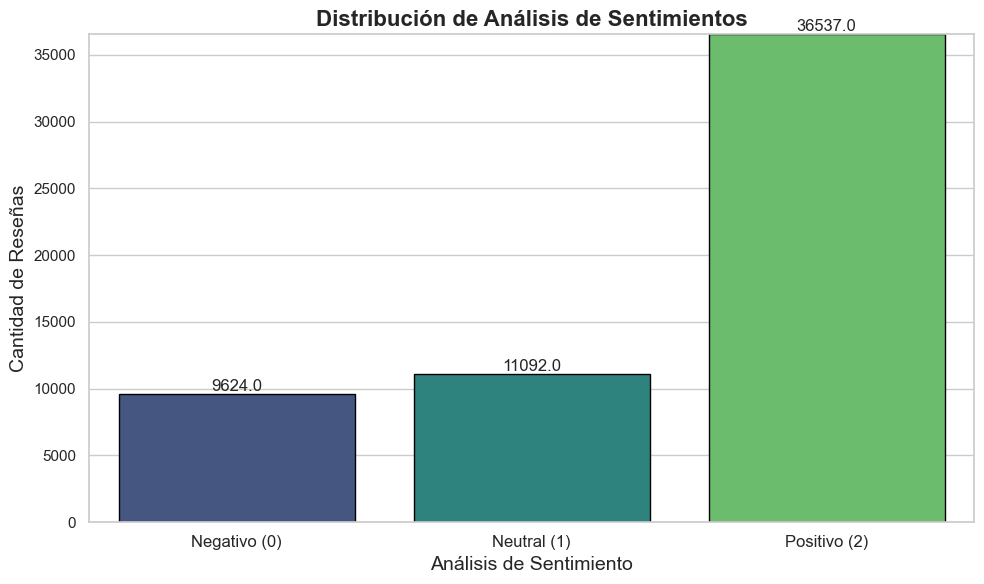

In [15]:
# Configuración del estilo de Seaborn
sns.set(style='whitegrid')
# Crear la figura
plt.figure(figsize=(10, 6))
# Crear el gráfico de conteo
sns.countplot(data=df_reviews, x='sentiment_analysis', palette='viridis', edgecolor='black')
# Agregar título y etiquetas
plt.title('Distribución de Análisis de Sentimientos', fontsize=16, fontweight='bold')
plt.xlabel('Análisis de Sentimiento', fontsize=14)
plt.ylabel('Cantidad de Reseñas', fontsize=14)
# Personalizar las etiquetas del eje x
plt.xticks(ticks=[0, 1, 2], labels=['Negativo (0)', 'Neutral (1)', 'Positivo (2)'], fontsize=12)
# Agregar etiquetas de conteo sobre cada barra
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)
# Mejorar los límites del eje y
plt.ylim(0, df_reviews['sentiment_analysis'].value_counts().max() + 10)
# Mostrar la gráfica
plt.tight_layout()  # Ajustar el diseño
plt.show()


### Se exporta el archivo para usar en el sistema de recomendaciones 

In [8]:
df_reviews.to_parquet('df_reviews_sentiment.parquet', engine='pyarrow', index=False)